# MIE1624 Introduction to Data Science and Analytics

## Assignment#1 KaggleSalary DayaSet Analysis

## Yixiao Hong - 1001311145

## 0.Background:
Kaggle has hosted an open data scientist competition in 2019 titled “2019 Kaggle ML & DS Survey
Challenge.” The purpose of this challenge was to “tell a data story about a subset of the data science
community represented in this survey, through a combination of both narrative text and data
exploration.” More information on the competition, data, and prizes can be found on:
https://www.kaggle.com/c/kaggle-survey-2019
The original dataset (multiple_choice_responses.csv) contains the survey results provided by Kaggle.
The survey results from 19717 participants are shown in 246 columns, representing survey questions. Not
all questions are answered by each participant, and responses contain various data types. 

### 0.1 The purpose of this assignment:


1.   understand and explore employment in the data science community, as represented in a survey conducted by Kaggle.
2.   train, validate, and tune multi-class ordinary classification problem that can classify, given a set of survey responses by a data scientist, what a survey respondent’s current yearly compensation bucket is.


### 0.2 Import libraries needed for the project:

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## 1.Data cleaning (20 marks):
While the data is made ready for analysis, several values are missing, and some features are categorical. Note that some values that appear “null” indicate that a survey respondent did not select that given option from a multiple-choice list. For example – “Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)” For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode for categorical data) and completely removing the features with missing values. Secondly, convert 3/6 MIE 1624 Introduction to Data Science and Analytics – Assignment 1 categorical data into numerical data by encoding and explain why you used this particular encoding method. These tasks can be done interchangeably, e.g., encoding can be done first.

### 1.1 Load the dataset

In [0]:
#Read the KaggleSalary DataSet
df = pd.read_csv("https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/Kaggle_Salary.csv", low_memory = False)

#Read the KaggleSalary Questions and build it to a dictionary based on column name so that we can always find what question this column is asking for in the future:
df_q = pd.read_csv("https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/multiple_choice_responses.csv", low_memory = False)
df_q = df_q.iloc[0]
df_q_dict = df_q.to_dict()

#have a brief view of the raw data
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,Na

In [0]:
df.shape

(12497, 248)

### 1.2 Remove Unrelated Columns
1.   After briefly looking at the dataset, I noticed that there are some columns with label of "OTHER_TEXT", which is encooded with numbers and provides no useful information to the analysis, thus I drop the columns with "OTHER_TEXT" 
2.   The first dolumn is "Time from Start to Finish (seconds)" which stores the data stored time, which potentially contributes little to the analysis, thus this column can also be dropped



In [0]:
#Remove column including "OTHER_TEXT" and  "Time from Start to Finish (seconds)" 
dropList = []
for col in df.columns:
  if "TEXT" in col or "Time from Start to Finish (seconds)" in col:
    dropList.append(col)
# print(dropList)
print("Find",len(dropList),"columns which needs to be dropped")
df = df.drop(columns = dropList)
display(df)

Find 29 columns which needs to be dropped


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,NaN,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,...,NaN,NaN,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...

### 1.3 Implement Strategy to Fill missing values (Nan)

#### 1.3.1 Check unique values of each colum

#### 1.3.2 Check which columns have NaN 

In [0]:
def CheckAnyNulls(check_df):
  nanSum = check_df.isna().sum()
  # print(len(nanSum))
  nanCols = []
  for col in nanSum.index:
    # print(nanSum[col])
    if nanSum[col] !=0:
      # print("Column:",col,"has",nanSum[col],"nan entries")
      nanCols.append(col)
  # print(len(nanCols),"out of",len(df.columns),"has NaN valus")
  return len(nanCols)

print(CheckAnyNulls(df),"out of",len(df.columns),"has NaN valus")

208 out of 219 has NaN valus


#### 1.3.3 Interpret NaN valus and Fill the NaN entries(Binary value columns)


> Notice that some of the columns which has Nan values has only binary unique values, in this case the NaN value can be interprete as "Not Selected"



> fill the columns which has binary values and include NaN as Nan = "Not Selected"





In [0]:
#fill the columns which has binary values and include NaN as Nan = 0 (means not selected) and the non-NaN value = 1 (means selected)
binaryCols_with_nan = []
nanSum = df.isna().sum()
for col in df.columns:
  if len(df[col].unique()) == 2 and nanSum[col] !=0: #which is a binary value column and one value is nan
    binaryCols_with_nan.append(col)

print("Number of Binary value columns with Nan:",len(binaryCols_with_nan))

print("==>Cleaning the binary value columns, nan= \"Not Selected")
for col in binaryCols_with_nan:
  df[col]=np.where(df[col].isna(),"Not Selected",df[col])

display(df)

Number of Binary value columns with Nan: 202
==>Cleaning the binary value columns, nan= "Not Selected


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"30,000-39,999",$0 (USD),Twitter (data science influencers),Not Selected,Not Selected,"Kaggle (forums, blog, social media, etc)",Not Selected,Not Selected,Not Selected,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,Not Selected,Not Selected,Not Selected,Not Selected,Coursera,Not Selected,DataCamp,Not Selected,Kaggle Courses (i.e. Kaggle Learn),Not Selected,Udemy,Not Selected,Not Selected,...,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Not Selected,Not Selected,Not Selected,Not Selected,"5,000-7,499","> $100,000 ($USD)",Not Selected,Not Selected,Not Selected,"Kaggle (forums, blog, social media, etc)",Not Selected,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Coursera,Not Selected,DataCamp,Not Selected,Kaggle Courses (i.e. Kaggle Learn),Not Selected,Udemy,Not Selected,Not Selected,...,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"250,000-299,999","$10,000-$99,999",Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",Not Selected,Not Selected,Not Selected,Coursera,edX,DataCamp,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,University Courses (resultin

#### 1.3.4 Analyze NaN values in non-binary value columns


> Notice that some of the columns which has Nan values has non-binary unique values, in this case the NaN value has to be solved from case to case. I firstly print out the percentage of NaN in each column


In [0]:
#Check the other columns with nan which is not binary
non_binaryCols_with_nan = []
nanSum_after_clean_binary = df.isna().sum()
for col in df.columns:
  if len(df[col].unique()) !=2 and nanSum_after_clean_binary[col] !=0: #which is a binary value column and one value is nan
    non_binaryCols_with_nan.append(col)

print("Number of non-Binary value columns with Nan:",len(non_binaryCols_with_nan),"they are:")
print("==========================================================================")
 
for col in non_binaryCols_with_nan:
  print(col,":",df_q_dict[col])
  print("\nUnique Values==>:",df[col].unique())
  print("\nThere are ",nanSum_after_clean_binary[col],"entries has nan which occupies",round(nanSum_after_clean_binary[col]/len(df)*100,2),"% of all data for this column")
  print("==========================================================================")



Number of non-Binary value columns with Nan: 6 they are:
Q11 : Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

Unique Values==>: ['$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99' nan]

There are  247 entries has nan which occupies 1.98 % of all data for this column
Q14 : What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

Unique Values==>: ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
 'Local development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)' 'Other'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'
 nan]

There are  1045 entries has nan which occupies 8.36 % of all data for this column
Q15 : How long have you been writing code to analyze data (at w

> After summarizing the NaNs for the non-binary value columns we find there are 6 non-binary value columns with NaNs and the rate of nan is ranging from 1.98% to 15.65%.

#### 1.3.5 Fill the NaN entries(non-binary value columns)
The strategy of filling the non-binary NaN entries is to drop the rows with NaN if the column has less than 5% NaN, if it has more than 5% NaN, I will fill the NaN with mode value, the Pros of doing this is that it is simple. The con of doing that is it has a risk of ends up dropping too many rows and some features are losing

In [0]:
print("Before cleaning,", CheckAnyNulls(df),"out of",len(df.columns),"has NaN valus")
print("Before cleaning,There are",df.shape[0],"rows")
for col in non_binaryCols_with_nan:
  if round(nanSum_after_clean_binary[col]/len(df),2) <=0.05:
    df.dropna(subset=[col],inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("After cleaning,",CheckAnyNulls(df),"out of",len(df.columns),"has NaN valus")
print("After cleaning,There are",df.shape[0],"rows")

Before cleaning, 6 out of 219 has NaN valus
Before cleaning,There are 12497 rows
After cleaning, 0 out of 219 has NaN valus
After cleaning,There are 12250 rows


There are 11422 rows remaining, thus we still have enough samples

**At this Point, there are no columns left with NaN value, we should treat this dataset as the data set after cleaning, store this dataset in df_cleaned for future reference**

In [0]:
df_cleaned = df.copy()
df_cleaned.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"30,000-39,999",$0 (USD),Twitter (data science influencers),Not Selected,Not Selected,"Kaggle (forums, blog, social media, etc)",Not Selected,Not Selected,Not Selected,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,Not Selected,Not Selected,Not Selected,Not Selected,Coursera,Not Selected,DataCamp,Not Selected,Kaggle Courses (i.e. Kaggle Learn),Not Selected,Udemy,Not Selected,Not Selected,...,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Not Selected,Not Selected,Not Selected,Not Selected,"5,000-7,499","> $100,000 ($USD)",Not Selected,Not Selected,Not Selected,"Kaggle (forums, blog, social media, etc)",Not Selected,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Coursera,Not Selected,DataCamp,Not Selected,Kaggle Courses (i.e. Kaggle Learn),Not Selected,Udemy,Not Selected,Not Selected,...,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"250,000-299,999","$10,000-$99,999",Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",Not Selected,Not Selected,Not Selected,Coursera,edX,DataCamp,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,University Courses (resultin

#### 1.3.6 Drop rows with any of the value having density of less than 0.5%
Some of the sample having value in one of the column which have very low density, these sample can be noisy and effecting our traning. Besides, if there are too many of these kind of values, there will be too many columns added into the dataset due to later one-hot encoding.

I decide to make the drop threshold to be 0.5% and after dropping the rows, there are 11000 entries and ifI go with 7/3 split for train and test, there is still 7700 samples for training which is good

In [0]:
print("Number of rows before drop:",df.shape[0])
val_drop_threshold = 0.005
number_of_rows = df.shape[0]

for col in df.columns.to_list():
  df_col_count = df[col].value_counts()
  df_col_count_density = df_col_count/number_of_rows
  df_col_count_dict_density= df_col_count_density.to_dict()
  delete_vals = []
  for val in df_col_count_dict_density:
    if df_col_count_dict_density[val]<= val_drop_threshold:
      delete_vals.append(val)
  df = df[~df[col].isin(delete_vals)]

print("Number of rows after drop:",df.shape[0])

Number of rows before drop: 12250
Number of rows after drop: 11000


noticeafter this step some of the columns will only have one value, need to drop whose columns

In [0]:
print("Number of columns before drop:",df.shape[1])
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
print("Number of columns after drop:",df.shape[1])

Number of columns before drop: 219
Number of columns after drop: 214


### 1.4  Convert categorical data into numerical data (Encoding)

In [0]:
#seperate the columns into binary value columns and non-binary value columns
bi_cols = []
non_bi_cols = []
for col in df.columns:
  if len(df[col].unique()) == 2:
    bi_cols.append(col)
  elif len(df[col].unique()) > 2:
    non_bi_cols.append(col)
  else:
    print("error")

print("#binary columns:", len(bi_cols))
print("#non-binary columns:", len(non_bi_cols))

#binary columns: 197
#non-binary columns: 17


In [0]:
#Create a dictionary of dictionary to store the encoder for future reference
encoder = dict()

#### 1.4.1 Encode binary value columns
> The encoding strategy for binary value columns are simple, I simply encode the value of "Not Selected" as 0 and the other value as 1

In [0]:
def add_encoder_dict(col_name, encoder,question,all_encoder_dict):
  #col_name = Q1,Q2...
  #encoder = {aa:1,bb:2,cc:3...}
  add_dict = dict()
  encoder_reverse = dict()
  for key in encoder:
    value = encoder[key]
    encoder_reverse[value] = key
  add_dict["Question"] = question
  for key in encoder_reverse:
    add_dict[encoder_reverse[key]] = key
  all_encoder_dict[col_name] = add_dict

for col in bi_cols:
  answers = list(df[col].unique())
  answers.remove('Not Selected')
  df[col]=np.where(df[col]=='Not Selected',0,1)
  encoder_temp = {0:'Not Selected',1:answers[0]}
  add_encoder_dict(col,encoder_temp,df_q_dict[col],encoder)

#### 1.4.2 Encode non-binary value columns (values have orders) with Label Encoding
> The encoding strategy for non-binary value columns depends on whether the values has potential ranking orders, print out the answers and analyze if the answers having potential ranking orders

In [0]:
for col in non_bi_cols:
  print("======================")
  print("Col name:",col)
  try:
    print(df_q_dict[col])
  except:
    print(col)
  print(df[col].unique())

Col name: Q1
What is your age (# years)?
['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']
Col name: Q2
What is your gender? - Selected Choice
['Male' 'Female' 'Prefer not to say']
Col name: Q3
In which country do you currently reside?
['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan' 'Other' 'Brazil'
 'South Korea' 'United Kingdom of Great Britain and Northern Ireland'
 'Sweden' 'Mexico' 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy'
 'Spain' 'Chile' 'South Africa' 'Argentina' 'Turkey' 'Israel' 'Nigeria'
 'Taiwan' 'Egypt' 'Morocco' 'Colombia' 'Switzerland' 'Viet Nam'
 'Singapore' 'Kenya' 'China']
Col name: Q4
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 

After analyzing the non-binary value columns, I decide the following features can be treated as having having potential ranking orders and I will manually assign the encoder to these questions as follows, **in this way I'm not losing the information of its potential orders after the encoding**:


*   Q1:What is your age (# years)?
['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69', '70+']
*   Q4:What is the highest level of formal education that you have attained or plan to attain within the next 2 years? ['Master’s degree' 'Professional degree' 'Bachelor’s degree' 'Doctoral degree' 'Some college/university study without earning a bachelor’s degree' 'I prefer not to answer' 'No formal education past high school']
*   Q6:What is the size of the company where you are employed? ['1000-9,999 employees' '> 10,000 employees' '0-49 employees' '50-249 employees' '250-999 employees']
* Q7 Approximately how many individuals are responsible for data science workloads at your place of business? ['0' '20+' '3-4' '1-2' '5-9' '10-14' '15-19']
* Q11:Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years? ['\$0 (USD)' '> \$100,000 (\$USD)' '\$10,000-\$99,999' '\$100-\$999' '\$1000-\$9,999' '\$1-\$99']
* Q15:How long have you been writing code to analyze data (at work or at school)? ['1-2 years' 'I have never written code' '< 1 years' '20+ years' '3-5 years' '5-10 years' '10-20 years']
* Q22: Have you ever used a TPU (tensor processing unit)? ['Never' 'Once' '6-24 times' '2-5 times']
* Q23: For how many years have you used machine learning methods? ['1-2 years' '< 1 years' '2-3 years' '10-15 years' '3-4 years' '4-5 years' '5-10 years'']


In [0]:
q1_encode = {
            '18-21':1,
            '22-24':2,
            '25-29':3,
            '30-34':4,
            '35-39':5,
            '40-44':6,
            '45-49':7,
            '50-54':8,
            '55-59':9,
            '60-69':10,
             '70+':11
             }
q4_encode = { 'I prefer not to answer' :0,
             'No formal education past high school':1,
              'Some college/university study without earning a bachelor’s degree':2,
              'Professional degree':3,
              'Bachelor’s degree':4,
              'Master’s degree' :5,
              'Doctoral degree':6
             }
q6_encode = { '0-49 employees' :1,
              '50-249 employees':2,
              '250-999 employees':3,
              '1000-9,999 employees':4, 
              '> 10,000 employees' :5,
             }
q7_encode = { '0' :1,
              '1-2' :2,
              '3-4' :3,
              '5-9':4,
              '10-14':5,
              '15-19':6,
              '20+' :7
             }
q11_encode = { 
            '$0 (USD)' :1,
            '$1-$99':2,
            '$100-$999':3,
            '$1000-$9,999':4, 
            '$10,000-$99,999':5, 
            '> $100,000 ($USD)':6
             }
q15_encode = {'I have never written code':1,
            '< 1 years':2,
            '1-2 years' :3,
            '3-5 years' :4,
            '5-10 years' :5,
            '10-20 years':6,
            '20+ years' :7
             }
q22_encode = {'Never':0,
              'Once':1,
              '2-5 times':2,
              '6-24 times':3,
              '> 25 times':4
             }
q23_encode = {'< 1 years' :1,
              '1-2 years' :2,
              '2-3 years' :3,
              '3-4 years' :4,
              '4-5 years':5,
              '5-10 years':6,
              '10-15 years':7,
              '20+ years':8
             }

add_encoders = {"Q1":q1_encode,
                "Q4":q4_encode,
                "Q6":q6_encode,
                "Q7":q7_encode,
                "Q11":q11_encode,
                "Q15":q15_encode,
                "Q22":q22_encode,
                "Q23":q23_encode
                }

for q in add_encoders:
  add_encoder_dict(q,add_encoders[q],df_q_dict[q],encoder)
  df[q] = df[q].replace(add_encoders[q])
  non_bi_cols.remove(q)

print("The remaining non-encoded coluimns are",non_bi_cols)

The remaining non-encoded coluimns are ['Q2', 'Q3', 'Q5', 'Q8', 'Q10', 'Q14', 'Q19', 'Q10_Encoded', 'Q10_buckets']


#### 1.4.3 Encode non-binary value columns (values have no orders) with One-hot encoding
The remaining columns where values hve no orders can be encoaded with **one-hot encoding techniques**
'Q2', 'Q3', 'Q5', 'Q8', 'Q10', 'Q14', 'Q19', 'Q10_Encoded', 'Q10_buckets'
Notice that 'Q10', 'Q10_Encoded', 'Q10_buckets' are targets and should not be encoded
thus the reamining columns needs to be encoded with one-hot are :
['Q1', 'Q3', 'Q5', 'Q8', 'Q14', 'Q19']

In [0]:
from sklearn import preprocessing
one_hot = preprocessing.OneHotEncoder()
#Select those columns needs to be one-hot encoded
one_hot_cols = ['Q2', 'Q3', 'Q5', 'Q8', 'Q14', 'Q19']
df_one_hot = pd.get_dummies(df[one_hot_cols])
df = df.drop(one_hot_cols, axis=1)
df = df.join(df_one_hot)

df_encoded = df.copy() #store a copy
df_encoded = df_encoded.drop(["Q10","Q10_buckets"], axis=1)  #drop the two columns of targets thats not encoded
df_encoded.head()

,Q1,Q4,Q6,Q7,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q15,Q16_Part_1,Q16_Part_2,...,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q8_I do not know,Q8_No (we do not use ML methods),Q8_We are exploring ML methods (and may one day put a model into production),"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)",Q8_We use ML methods for generating insights (but do not put working models into production),"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local development environments (RStudio, JupyterLab, etc.)",Q14_Other,Q19_C,Q19_C++,Q19_Java,Q19_MATLAB,Q19_Other,Q19_Python,Q19_R,Q19_SQL
0,2,5,4,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6,3,5,7,1,1,1,1,0,0,0,0,6,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,6,5,5,7,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,8,5,1,3,0,0,1,0,0,1,0,0,5,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


**At this point, all the features are encoded (by either binary encoading to 1/0, label encoding or one-hot encoding). there are 308 columns in total (1 column is the encoded Q10 which is the target)**

## 2.Exploratory data analysis (15 marks):



### 2.1 Figures representing trends in the data
Present 3 graphical figures that represent trends in the data. How could these trends be used to
help with the task of predicting yearly compensation or understanding the data? All graphs
should be readable and presented in the notebook. All axes must be appropriately labelled.

#### 2.1.1 Figure1: Distributuon plot of salary range (15 buckets)

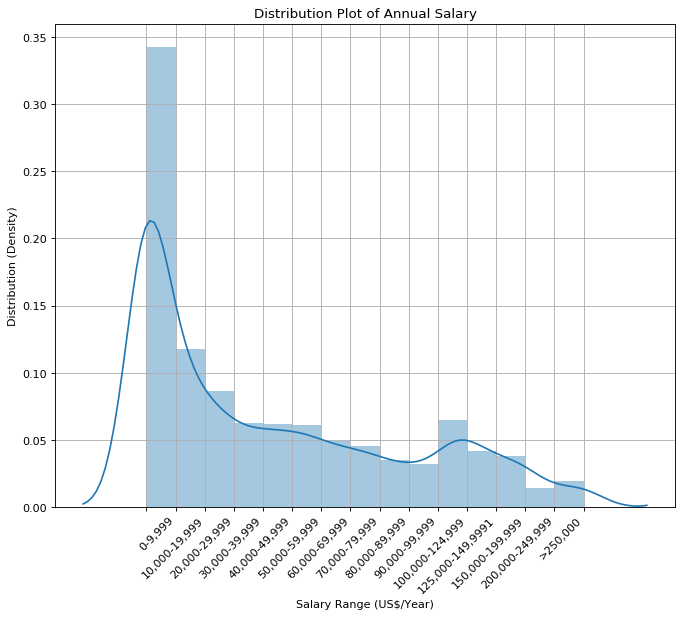

In [0]:
salary_buckets_reverse = {    
0:'0-9,999',
1:'10,000-19,999',
2:'20,000-29,999',
3:'30,000-39,999', 
4:'40,000-49,999', 
5:'50,000-59,999',
6:'60,000-69,999',
7:'70,000-79,999', 
8:'80,000-89,999', 
9:'90,000-99,999',
10:'100,000-124,999',
11:'125,000-149,9991',
12:'150,000-199,999',
13:'200,000-249,999',
14:'>250,000'
}

#separate targets and features
df_target = df_cleaned['Q10_Encoded']
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
fig = sns.distplot(df_target,hist=True,bins=15,norm_hist=True)
loc = np.arange(start=0, stop=14.8, step=14/15)
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
a=[""]*16
for i in range(1,16):
  a[i] = salary_buckets_reverse[i-1]
fig.set_xticklabels(a)
plt.xticks(rotation=45, ha="right" )
plt.xticks(loc)
plt.xlabel("Salary Range (US$/Year)")
plt.ylabel("Distribution (Density)")
plt.grid(True)
plt.title("Distribution Plot of Annual Salary") 
plt.show()


> As is shown in the distribution plot, the distribution is skewed heavily to the left with more than 20% samples having an annual salary of less than \$10000 per year. About 50% samples fail into the lowest three salary buckets (0-9999,10000-19999,20000-29999). The distribution plot implies that the majority of people earn less than \$30000 per year. **This plot can be a useful reference to check if the later predicted targets also fall into a similar distribution**



#### 2.1.2 Figure2: Histogram of Respondents' Age and Gender

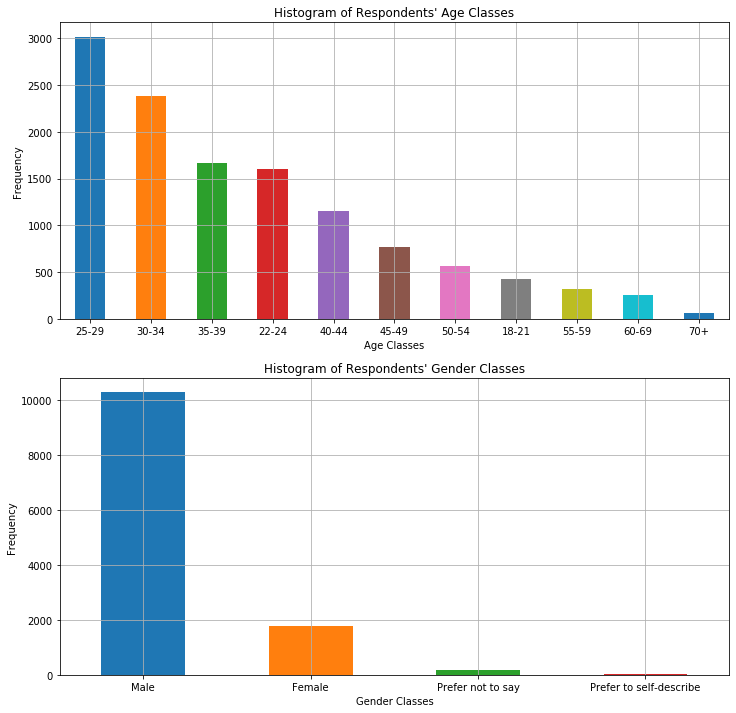

In [0]:
fig = plt.figure(figsize=(12,12))
#get gender and age data and count groups
gender_data = df_cleaned['Q2']
gender_count = gender_data.value_counts()
age_data = df_cleaned['Q1']
age_count = age_data.value_counts()

#prepare plots
plt.subplot(211)
fig = age_count.plot(kind = 'bar', rot = 0, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.grid(True)
plt.xlabel("Age Classes")
plt.ylabel("Frequency")
plt.title('Histogram of Respondents\' Age Classes')

plt.subplot(212)
gender_count.plot(kind = 'bar', rot = 0, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.grid(True)
plt.xlabel("Gender Classes")
plt.ylabel("Frequency")
plt.title('Histogram of Respondents\' Gender Classes')
plt.show()




> From the histogram we can tell that the majority of the respondents are aged between 25-34 and there is a significant gap between the number of male respondents and the number of female respondents (over 4 times male than female). **Looking at the structure of respondents can help us determine whether the dataset is biased due to unbalanced distribution.**





#### 2.1.3 Figure3: Box plot of Respondents' Salary Range vs. Years of Using Machine Learning Methods/ Age

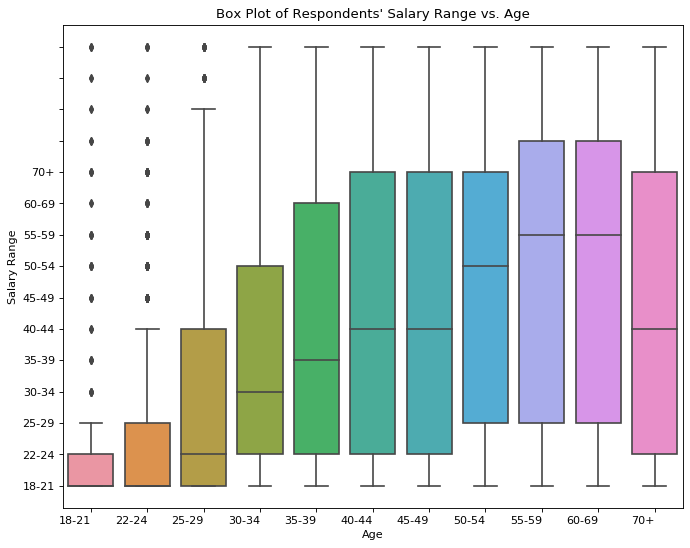

In [0]:
q1_encoder_reverse = {
            1:'18-21',
            2:'22-24',
            3:'25-29',
            4:'30-34',
            5:'35-39',
            6:'40-44',
            7:'45-49',
            8:'50-54',
            9:'55-59',
            10:'60-69',
             11:'70+'
             }
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
box_fig = sns.boxplot(data = df_encoded, x="Q1", y="Q10_Encoded")
plt.yticks(np.arange(15), ('18-21','22-24','25-29','30-34', '35-39', '40-44','45-49','50-54', '55-59', '60-69','70+'))
a=[""]*11
for i in range(1,12):
  a[i-1] = q1_encoder_reverse[i]
box_fig.set_xticklabels(a)
plt.xticks(rotation=0, ha="right")
plt.xlabel('Age')
plt.ylabel('Salary Range')
plt.title('Box Plot of Respondents\' Salary Range vs. Age')
plt.show()

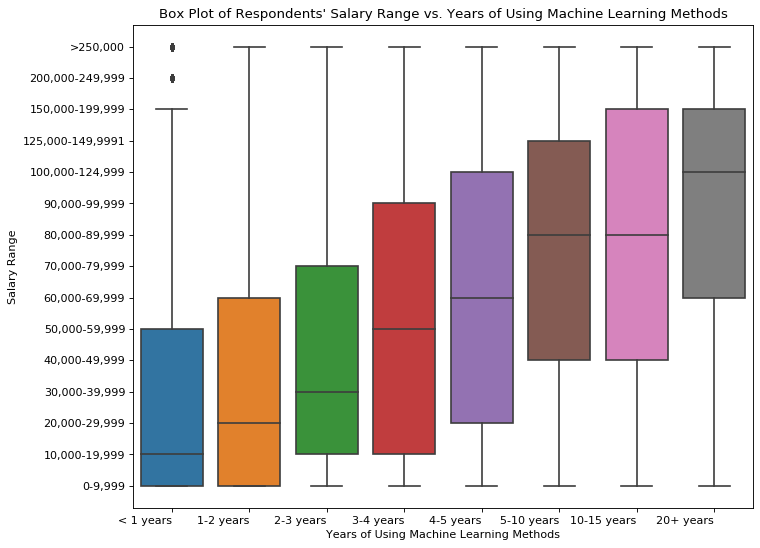

In [0]:
q23_encode_reverse = {1:'< 1 years',
              2:'1-2 years',
              3:'2-3 years',
              4:'3-4 years',
              5:'4-5 years',
              6:'5-10 years',
              7:'10-15 years',
              8:'20+ years'
             }

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
box_fig = sns.boxplot(data = df_encoded, x="Q23", y="Q10_Encoded")
plt.yticks(np.arange(15), ('0-9,999','10,000-19,999','20,000-29,999','30,000-39,999', '40,000-49,999', '50,000-59,999','60,000-69,999','70,000-79,999', '80,000-89,999', '90,000-99,999','100,000-124,999','125,000-149,9991','150,000-199,999','200,000-249,999','>250,000'))
a=[""]*8
for i in range(1,9):
  a[i-1] = q23_encode_reverse[i]
box_fig.set_xticklabels(a)
plt.xticks(rotation=0, ha="right")
plt.xlabel('Years of Using Machine Learning Methods')
plt.ylabel('Salary Range')
plt.title('Box Plot of Respondents\' Salary Range vs. Years of Using Machine Learning Methods')
plt.show()



> The box plot of "Respondents' Salary Range vs. Years of Using Machine Learning Methods' shows a very interesting trend **the more years the respondent is experienced in machine learning methods, the more average salary the respondent earns. This plot implies that "Years of using machine learning methods" might have a strong correlation to the salary.** In the future prediction, this correlation should be further analysed


> The box plot of "Respondents' Salary Range vs. Age' also shows a general trend that **the older the respondent, the more average salary the respondent earns. This plot implies that age might have porential correlation to the salary.** 





### 2.2 Visualize the Order of Feature Importance
b. Visualize the order of feature importance. Some possible methods include correlation plot, or
a similar method. Given the data, which of the original attributes in the data are most related to
a survey respondent’s yearly compensation?
 The steps specified before are not in a set order. 

#### 2.2.1 Generate correlation matrix between features
In this section, we are trying to generate the correlation matrix and find the correlation between target (Q10) and other features and find out which features are mostly correlated with the target. This will provides us with some information about which features are more important than others when estimating the target (salary) 

In [ ]:
#get the correlation 
corr_matrix = df_encoded.corr()
#Generate ehe correlation heatmap for
#corr_matrix.style.background_gradient(cmap=sns.diverging_palette(220, 20, as_cmap=True))



> **The above correlation matrix gives us a brief view of the correlation between each pair of features. But we are more interested in the relationship between the target ("Q10_Encoded") and the rest features, thus I'm extracting the correlation coefficient between "Q10_encoded" and the rest features and rank them from the largest to the smallest value**







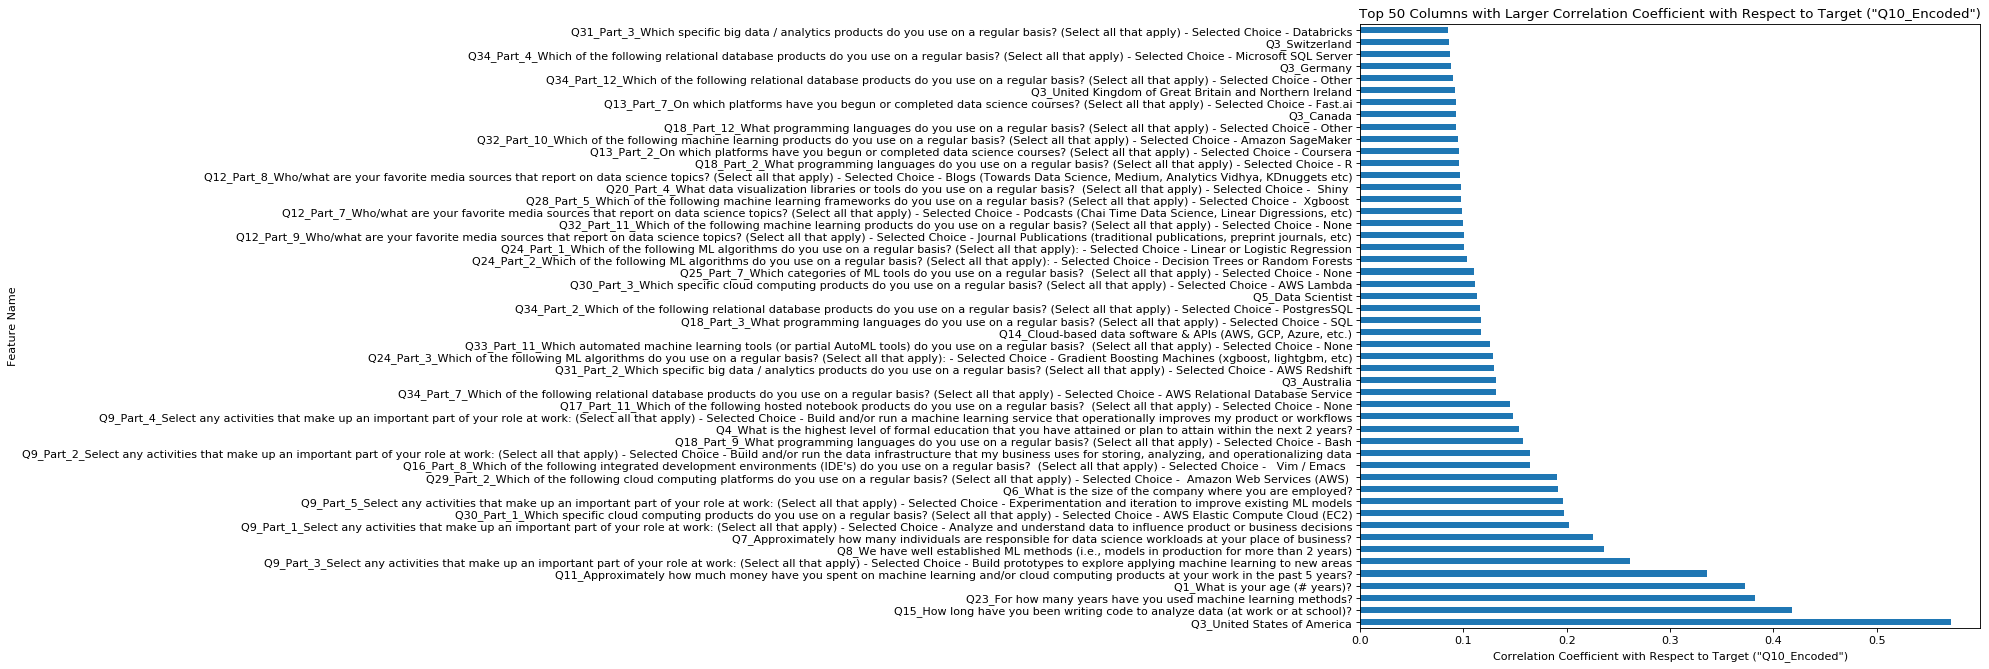

In [0]:
largest_cols = corr_matrix.nlargest(51, 'Q10_Encoded')['Q10_Encoded']
largest_cols = largest_cols[1:]
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
largest_cols.plot(kind="barh",)
plt.xlabel('Correlation Coefficient with Respect to Target ("Q10_Encoded")')
plt.ylabel('Feature Name')
plt.title('Top 50 Columns with Larger Correlation Coefficient with Respect to Target ("Q10_Encoded")')
locs, labels = plt.yticks()
label_str_ls = []
for lab in labels:
  label_str_ls.append(lab.get_text())
for i in range(len(label_str_ls)):
  col = label_str_ls[i]
  try:
    label_str_ls[i] = col + "_" + df_q_dict[col]
    # print(label_str_ls[i])
  except:
    pass
plt.yticks(np.arange(50), label_str_ls)
plt.show()



> As shown in the plot of "Top 50 Columns with Larger Correlation Coefficient with Respect to Target ("Q10_Encoded")", the column with highest Correlation Coefficient to target are:
1.   Q3: Whether the respondent is from USA or not
2.   Q15: "How long have you been writing code to analyze data"
3.   Q23: "For how many years have you used machine learning methods?"
4.   Q1: "What is your age (# years)?"
5.   Q11: "Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?"

> By analyzing the top correlated features, it can be concluded that the respondent's salary is most likely related to the respondent's age, years of experience in /amount of money spent on machine learning and coding experience. Despite that, the intersting finding is that the most correlated feature is whether the respondent is from USA, the reason might be that the average salary of respondents from USA is significantly larger than those from other countries.



> The correlation Coefficient provides us a straightforward way of measuring the strength of the relationship between two features







## 3.Feature selection (10 marks):
Explain how feature engineering is a useful tool in machine learning. Then select the features to
be used for analysis either manually or through some feature selection algorithm (e.g. regularized
regression).
Not all features need to be used; features can be removed or added as desired. If the resulting
number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at
least one feature selection technique – describe the technique and provide justification on why
you selected that set of features.



> **What is feature engineering:**
Feature engineering is the process of  extracting features from raw data via data mining techniques. The properly selected features can reduce the computational cost of the traning and classifying process and also improve the performance of the machien learning algorithms.





### 3.1 Remove redundant features with high feature correlation coefficient



> Notice that in the correlation matrix, there are some features which are strongly correlated, which means either of the feature can give almost the same information, this we can drop one of feature in each pair of features with high correlation coefficient, here I selected the drop threshold of correlation coefficient >= 0.6


In [0]:
print("Total number of features before drop:", len(df_encoded.columns)-1)
cols = np.full((corr_matrix.shape[0],), True, dtype=bool)
dropped_col = []
#loop through the correlation matrix and 
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.60:
            if cols[j]:
              dropped_col.append([corr_matrix.columns[i],corr_matrix.columns[j],corr_matrix.iloc[i,j]])
              cols[j] = False
selected_columns = df_encoded.columns[cols]
df_encoded = df_encoded[selected_columns]
print("Total number of features after drop:", len(df_encoded.columns)-1)

Total number of features before drop: 276
Total number of features after drop: 256


In [0]:
#print out the dropped features
for a,b,v in dropped_col:
    print("==========================")
    print("==>Question realted to dropped feature:")
    try:
      print(df_q_dict[a])
    except:
      print(a)
    print("==>Question realted to the paired feature:")
    try:
      print(df_q_dict[b])
    except:
      print:b
    print("Correlation Coefficient=",v)

==>Question realted to dropped feature:
How long have you been writing code to analyze data (at work or at school)?
==>Question realted to the paired feature:
For how many years have you used machine learning methods?
Correlation Coefficient= 0.631594306610614
==>Question realted to dropped feature:
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) 
==>Question realted to the paired feature:
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
Correlation Coefficient= 0.632504424388469
==>Question realted to dropped feature:
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio 
==>Question realted to the paired feature:
What programming languages do you use on a regular basis? (Select all that appl

By looking at the content of the dropped features, we can see that the feature pair with high correlation coefficient has a strong relationship, such as "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio " vs. "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R" these two features both provides information that the respondent have used R language



> The # of features dropped from 276 to 256 which is still very high, thus other feature selection methods needs to be further implemented



###3.2 Select Features using sklearn.feature_selection.SelectFromModel



> In this section, I use the API feature_selection.SelectFromModel from Sklearn to help further reduce the size of features. This API takes a trained model and removes less important features based on a threshold. Here, I pick LogisticRegression with default parameters as the model and set the threshold as "mean", I'm aiming at dropping down features down to less than 100 features 



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

#Get the Test and train features
y=df_encoded["Q10_Encoded"]
X=df_encoded.drop(['Q10_Encoded'], axis=1)

print("Total number of features before:", len(X.columns))

#Build the default logictic regression model
lr = LogisticRegression()
lr.fit(X, y);

#get the selected features
model = SelectFromModel(lr, prefit=True, threshold='mean')
X_Selected = X.copy()[X.columns[(model.get_support())]]

print("Total number of features After drop:", X_Selected.shape[1])

Total number of features before: 256
Total number of features After drop: 72


After using SelectFromModel, I get 72 selected features

### 3.3 Impliment PCA to reduce the dimension (Demo)



> Principal component analysis (PCA) is a commonly used method for reducing features while still keeping most of the information. Since after dimension reduction, the selected features are 72 and is not very high, we don't really need to further use PCA to further reduce dimensions, thus I will simply demonstrate how PCA can reduce dimension while still preserve high data variance here. **But I'm not actually using PCA to further reduce dimension** The **Pros** of using PCA is that it can efficiently reduce dimension while still keep high data variance and thus maintain the major information and thus reduce the computational cost. The **Cons** of doing this is that the features get from PCA has no intuitive meaning since the values are obtained by projection



In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
shape_before = X_Selected.shape
print("Dataframe Shape Before PCA:", shape_before)
pca = PCA(0.9999) # for plot only, just want the trend line
pca.fit(X_Selected) # for plot only
trend = np.cumsum(pca.explained_variance_ratio_) 
pca = PCA(0.99) #preserving 95% features, the actual PCA
pca.fit(X_Selected)
X_Selected_PCA_transformed = pca.transform(X_Selected)
shape_after = X_Selected_PCA_transformed.shape
print("Dataframe Shape After PCA:", shape_after)

Dataframe Shape Before PCA: (11000, 72)
Dataframe Shape After PCA: (11000, 64)


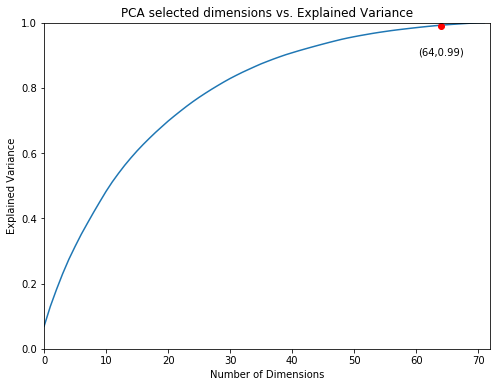

In [0]:
plt.figure(figsize=(8,6))
axes = plt.plot(trend)
plt.xlabel("Number of Dimensions")
plt.ylabel("Explained Variance")
plt.title("PCA selected dimensions vs. Explained Variance")
plt.xlim(0,shape_before[1])
plt.ylim(0,1)
x_axs = [shape_after[1]]
y_axs = [0.99]
plt.plot(x_axs[0], y_axs[0], 'ro')
plt.text(shape_after[1], 0.90, "("+str(shape_after[1])+",0.99)", ha='center')
plt.show()



> As shown from the plot, after PCA, the dimension is reduced from 72 to 64 while the dataset still keeps explained variance 0.99 (**PCA is not really necessary needed here since the original dimension is not very high**)



#### 3.4 Train Test set split


In [0]:
from sklearn.model_selection import train_test_split
#Get the Test and train features
y=df_encoded["Q10_Encoded"]
X=df_encoded.drop(['Q10_Encoded'], axis=1)
#split the train dataset and the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print("Training feature set size:",X_train.shape[0]/10*7)
print("Validation feature set size:",X_train.shape[0]/10*3)
print("Final test set size:",y_test.shape[0])
print("Training target size:",y_train.shape[0]/10*7)
print("Validation target size:",y_train.shape[0]/10*3)
print("Final test target size:",y_test.shape[0])

Training feature set size: 6545.0
Validation feature set size: 2805.0
Final test set size: 1650
Training target size: 6545.0
Validation target size: 2805.0
Final test target size: 1650


## 4.Model implementation (25 marks):
Implement logistic regression algorithm on the training data using 10-fold cross-validation. How
does your model accuracy compare across the folds? What is average and variance of accuracy for
folds? Treating each value of hyperparameter(s) as a new model, which model performed best?
Give the reason based on bias-variance trade-off. An output of your algorithm should be a
probability of belonging to each of the salary buckets. Apply scaling/normalization of features, if
necessary.

### 4.1 Implimenting Logistic regression Model
I split the dataset into 70% test data and 30% training data, and for now, I'm just using the default parameters for the logistic regression model, further tuning of the model will be performed in next session

#### 4.1.1 Model Implimentation

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

#Build the logistic regression Model
class logistic_regression_model:


  def __init__(self, X, y , C=0.0001, test_size = 0.3, penalty='l2', solver='lbfgs',rand = None):
    #init function
    self.X = X
    self.y = y
    self.C = C
    self.penalty = penalty
    self.solver = solver

    #split train test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = None)
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test

    #create model
    model = LogisticRegression(C=C, penalty=penalty, solver=solver)
    #fit model
    model.fit(X_train, y_train)
    self.model = model
    
    #predict test value
    y_pred = self.model.predict(X_test)
    self.y_pred = y_pred
    
    self.accuracy = accuracy_score(y_test, y_pred)
    self.accuracy_percent = round(self.accuracy*100,2)

  
  def test(X_t,y_t):
    #Thisfunction takes the test dataset X and y and return the accuracy
    y_t_pred = self.model.predict(X_t)
    t_acc = accuracy_score(y_t, y_t_pred)
    return y_t_pred, t_acc

  def get_probability_distribution_array(self):
    #This function returns the probability of the entry belonging to each 
    #of the salary buckets
    np_prob = self.model.predict_proba(self.X_test)
    return np_prob

  def get_probability_distribution_df(self):
    #This function returns the probability of the entry belonging to each 
    #of the salary buckets in a dataframe format
    np_prob = self.model.predict_proba(self.X_test)
    bucket_title = []
    for i in range(15):
      bucket_title.append("Bucket#"+str(i))
    df = pd.DataFrame(data=np_prob, columns = bucket_title)
    df['y_pred'] = np.array(self.y_pred)
    df['y_true'] = np.array(self.y_test)

    return df



  def get_learning_curve_plot(self):
    #this function returns the learning plot of the model
    plt.figure(figsize=(10,6))
    #get learning curve
    train_sizes, train_scores, test_scores = learning_curve(self.model, self.X, self.y, scoring='accuracy', train_sizes=np.linspace(.1, 1.0, 5), n_jobs=5,cv=None)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fill the range of the score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #plot the score trend
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="The learning curve for the training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="The learning curve for the cross-validation set")
    plt.legend(loc="best")
    plt.grid()
    plt.ylim(0,1)
    plt.title('Logistic Regression Learning Curve with C='+ str(C))
    plt.xlabel("# of training data")
    plt.ylabel('Accuracy Score')
    return plt


#### 4.1.2 Create an instance of the model with default parameters 

In [0]:
#Use the splited train data features and test for the following training progress

#create an instance of the logistic regression model
myLRModel = logistic_regression_model(X_train,y_train)

print("parameters of the model:")
print(myLRModel.model)


print("\nThe accuracy after training with default logistic regression mode is:",myLRModel.accuracy_percent ,"%")


parameters of the model:
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy after training with default logistic regression mode is: 32.01 %


#### 4.1.3 Show the output from the model of a matrix showing predicted results belonging to each of the salary buckets

In [0]:
#The model has a function called "get_probability_distribution_array()" 
#which will return the probability of the entry belonging to each 
#of the salary buckets

myLRModel.get_probability_distribution_array()

array([[0.35186839, 0.10655714, 0.07961151, ..., 0.03386689, 0.01381271,
        0.01573553],
       [0.26993529, 0.10877758, 0.0852723 , ..., 0.0428173 , 0.0162249 ,
        0.0185431 ],
       [0.42442275, 0.10091772, 0.07242507, ..., 0.02854734, 0.01195658,
        0.01366814],
       ...,
       [0.12610223, 0.0926626 , 0.08778511, ..., 0.06684375, 0.02267941,
        0.02619819],
       [0.39068973, 0.10626441, 0.07627428, ..., 0.03074518, 0.01274684,
        0.01463377],
       [0.35206843, 0.10490766, 0.08028545, ..., 0.03438883, 0.01384886,
        0.01575941]])

In [0]:
#The model also has a function called "get_probability_distribution_df()" 
#which will return the probability of the entry belonging to each 
#of the salary buckets in a dataframe format
myLRModel.get_probability_distribution_df().head()

,Bucket#0,Bucket#1,Bucket#2,Bucket#3,Bucket#4,Bucket#5,Bucket#6,Bucket#7,Bucket#8,Bucket#9,Bucket#10,Bucket#11,Bucket#12,Bucket#13,Bucket#14,y_pred,y_true
0,0.351868,0.106557,0.079612,0.052823,0.056444,0.050332,0.043404,0.039730,0.029535,0.030759,0.057385,0.038135,0.033867,0.013813,0.015736,0,1
1,0.269935,0.108778,0.085272,0.059098,0.062359,0.056445,0.049208,0.045402,0.033285,0.035972,0.069706,0.046954,0.042817,0.016225,0.018543,0,10
2,0.424423,0.100918,0.072425,0.047943,0.050018,0.044512,0.038668,0.034440,0.025652,0.026735,0.047770,0.032325,0.028547,0.011957,0.013668,0,0
3,0.263834,0.112191,0.090085,0.055922,0.062081,0.055084,0.049088,0.045862,0.033276,0.036995,0.069864,0.046831,0.043188,0.016780,0.018919,0,6
4,0.357692,0.101827,0.075762,0.052659,0.056676,0.049965,0.042923,0.040460,0.029543,0.031046,0.059679,0.037526,0.033909,0.013916,0.016418,0,7


### 4.3 Implementing Logistic Regression using 10-fold Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
#Record k-folds accuracy
accuracy_record = [0]*10
i = 1

#build the logistic regression model
mModel = logistic_regression_model(X_train,y_train)

cross_val_score_list = cross_val_score(mModel.model, X_train, y_train, cv=10)
np_cross_val_score_list = np.array(cross_val_score_list)

print("10-fold cross validation result:")
for i in range(10):
  print("Fold",i+1,"accuracy:",round(np_cross_val_score_list[i]*100,2),"%")

print("\n============================\n")
print("10-fold Corss Validation, average accuracy=",round(np.mean(np_cross_val_score_list)*100, 2),"%, accuracy variance =",round(np.std(np_cross_val_score_list), 5))

10-fold cross validation result:
Fold 1 accuracy: 31.98 %
Fold 2 accuracy: 31.55 %
Fold 3 accuracy: 31.76 %
Fold 4 accuracy: 31.76 %
Fold 5 accuracy: 31.76 %
Fold 6 accuracy: 31.87 %
Fold 7 accuracy: 31.76 %
Fold 8 accuracy: 31.76 %
Fold 9 accuracy: 31.76 %
Fold 10 accuracy: 31.66 %


10-fold Corss Validation, average accuracy= 31.76 %, accuracy variance = 0.00107


10-Folds Cross Validation Results

In [0]:
print("Applying the default LogisticRegression model on the entire dataset, \nthe accuracy is {}%  \nwhile using 10-fold corss validation with default LogisticRegression model, \nthe average accuracy is {}% \nwith an accuracy variance of {}.".format(myLRModel.accuracy_percent,round(np.mean(np_cross_val_score_list)*100, 2),round(np.std(np_cross_val_score_list),5)))

Applying the default LogisticRegression model on the entire dataset, 
the accuracy is 32.01%  
while using 10-fold corss validation with default LogisticRegression model, 
the average accuracy is 31.76% 
with an accuracy variance of 0.00107.


### 4.4 Treating each value of hyperparameter(s) as a new model, and compair the performance


Now I'm trying to change the C value of the sigmoid function of the logistic regression model and try some C value and see the performance of the model.In sigmoid function, higher values of C correspond to less regularization. I will pick the best model based on bias-variance trade-pff from learning curve. Learning curves give us an opportunity to diagnose bias and variance in supervised learning models



<img src="https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/sig.png" width="600">

**Bias-variance Trade-off**

> reference: https://www.dataquest.io/blog/learning-curves-machine-learning/


> In supervised learning, when we train a model with different training sets, we might get different testing results. The amount by which testing results changes as we change the reaining sets is called variance.



> When we generate a classifier, we use different model or same model with different parameters. Sometimes when we simplifying the trend of the dataset to a model, we give bias to the model.



**The trade off between bias and variance is that, if we make a low-biased model, it will fit training data very well but if we change traninig set we will get significantly different result, this is a case of Overfitting. The reverse also holds, if we make a very general model and it doesn't fit well with the training data, we might getting low varance between results from different training sets. This is a case of underfitting.**







In this section, i will first try some different C values to create different models to compare, however, in the next session I will perform fine tuning with more parameters

Train & Validate Logistic Regression Model with C= 0.0001


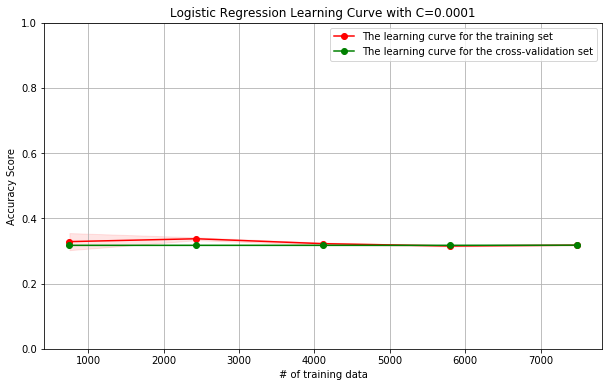

Train & Validate Logistic Regression Model with C= 0.001


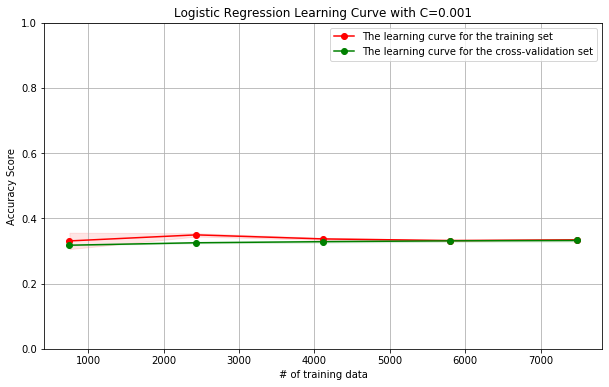

Train & Validate Logistic Regression Model with C= 0.01


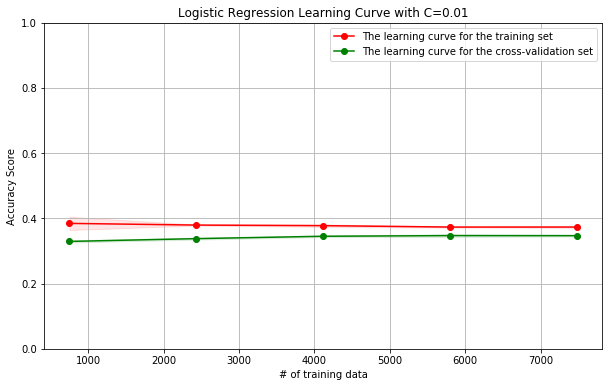

Train & Validate Logistic Regression Model with C= 0.1


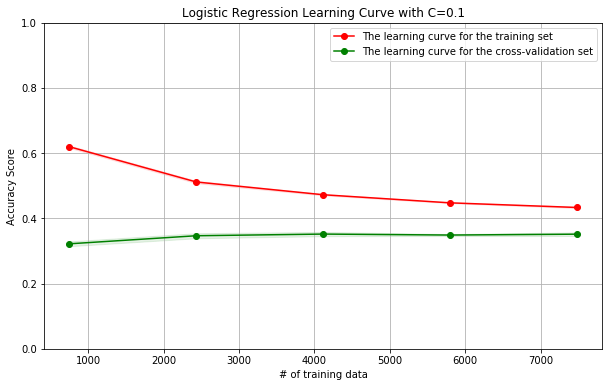

Train & Validate Logistic Regression Model with C= 1


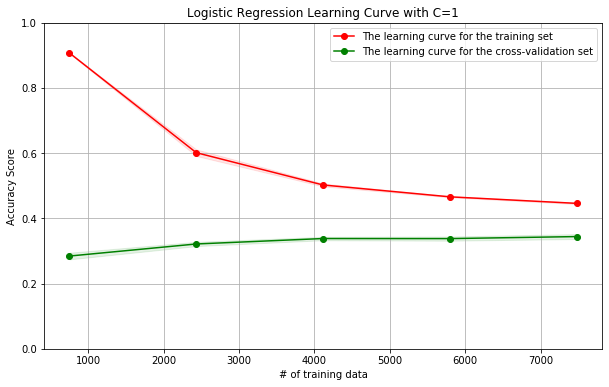

Train & Validate Logistic Regression Model with C= 10


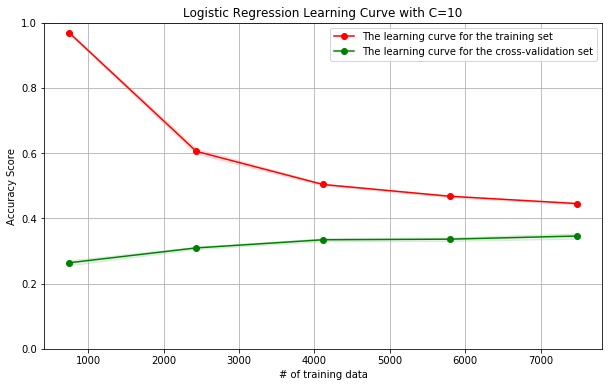

In [0]:
from sklearn.model_selection import learning_curve

C_vals = [0.0001,0.001,0.01,0.1,1,10] #some different value of the C in logistic regression to try

for C in C_vals:
  print("===========================================================")
  print("Train & Validate Logistic Regression Model with C=",C)

  mModel = logistic_regression_model(X_train,y_train,C)
  mModel.get_learning_curve_plot().show()



> with very lower C value (C=0.001), from the learning curve we can see that  the training score is close to the test score and they converge. In addition, both training accuracy and test accuracy are relatively low, **this indicates that the model has high bias and low variance**.



> While with the C value going higher and higher, from the learning curve we can see that the training score gradually improves and test score slightly improves, however, the gap between the training score and test score become larger and larger. **This means that the model has low variance and high bias**.



> **Thus aonsider the trade-off between bias and variance,the ideal C value should be somewhere in between 0.01 and 0.1 and finer tuning will be performed in the next section (using grid search)**





<img src="https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/low_high_bias.png" width="600">
<img src="https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/low_high_var.png" width="600">

## 5.Model tuning (20 marks):
Improve the performance of the models from the previous step with hyperparameter tuning and
select a final optimal model using grid search based on a metric (or metrics) that you choose.
Choosing an optimal model for a given task (comparing multiple classifiers on a specific domain)
requires selecting performance measures, for example accuracy, precision, recall and/or F1-score
to compare the model performance.
There is no minimum model accuracy, as long as your methodology is reasonable and well
explained. 

### 5.1 Hyperparameter Tuning (Optimal Accuracy Domain)

> In this section, I'm using sklearn.model_selection.GridSearchCV to help picking the optimal parameter of the model to achieve best accuracy

> After looking at the parameters in the sklearn.linear_model.LogisticRegression API, I discovered the following parameters might be able to tuned to improve the model performance:

1.   penalty:{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
2.   C:float, default=1.0
3. solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’



> sklearn.model_selection.GridSearchCV is used to perform grid search to select the optimal hyperparameter for the model. The selected candidate values for the hyperparameters are ['l1', 'l2'] for the penality, [0.01,0.03,0.05,0.07,0.01,0.3,0.5,0.7,1,3,5,7,10] for C and ['newton-cg','lbfgs','liblinear','sag','saga'] for solver.



In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty' : ['l1', 'l2'],
              'C':[0.001,0.005,0.01,0.03,0.05,0.07,0.1,0.3,0.5,0.7,1,3,5,7,10],
              'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']}

#Linear regression model
lr = LogisticRegression()
#grid search engine
grdlr = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'accuracy')
#select best logisticregression model
best_lr = grdlr.fit(X_train, y_train)
#best parameter results for grid search
print("Best hyperparameter combination:\n",grdlr.best_params_)
print("Best score:\n",grdlr.best_score_)

Best hyperparameter combination:
 {'C': 0.07, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:
 0.3504812834224599


### 5.2 Performance Compareation (Accuracy)
Compare the model performance bewteen the default model and the fine tuned model in terms of accuracy

In [0]:
#defaultModel
defaultModel = logistic_regression_model(X_train,y_train)
defaultModel_accuracy = round(defaultModel.accuracy,3)

#bestModel
best_parameters= grdlr.best_params_
bestModel = logistic_regression_model(X_train,y_train,best_parameters["C"],0.3,best_parameters['penalty'],best_parameters['solver'])
bestModel_accuracy = round(bestModel.accuracy,3)

In [0]:
print("Default Model:")
print("Accuracy=",defaultModel_accuracy)
print("Tuned Best Model:")
print("Accuracy=",bestModel_accuracy)
print("Default model has", str(round(((bestModel_accuracy-defaultModel_accuracy)/defaultModel_accuracy)*100,2))+"%", "better performance than default model in terms of Accuracy")

Default Model:
Accuracy= 0.326
Tuned Best Model:
Accuracy= 0.355
Default model has 8.9% better performance than default model in terms of Accuracy


### 5.3 Performance Compareation
for curiosity, I'm also printing out the precision score, recall and f1 score to see if the optimal model improved from the default model

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [0]:
defaultModel_precision = round(precision_score(y_true = defaultModel.y_test.to_list(),y_pred =  defaultModel.y_pred.tolist(),average='weighted'),2)
defaultModel_recall = round(recall_score(y_true = defaultModel.y_test.to_list(), y_pred = defaultModel.y_pred.tolist(),average='weighted'),2)
defaultModel_f1 = round(f1_score(y_true = defaultModel.y_test.to_list(), y_pred = defaultModel.y_pred.tolist(),average='weighted'),2)

bestModel_precision = round(precision_score(y_true = bestModel.y_test, y_pred = bestModel.y_pred, average='weighted'),2)
bestModel_recall = round(recall_score(y_true = bestModel.y_test,  y_pred =bestModel.y_pred, average='weighted'),2)
bestModel_f1 = round(f1_score(y_true = bestModel.y_test,  y_pred =bestModel.y_pred, average='weighted'),2)

print("Default Model:")
print("Precision=",defaultModel_precision,"Recall=",defaultModel_recall,"F1=",defaultModel_f1)
print("Tuned Best Model:")
print("Precision=",bestModel_precision,"Recall=",bestModel_recall,"F1=",bestModel_f1)

dss = [defaultModel_precision,defaultModel_recall,defaultModel_f1]
bss = [bestModel_precision,bestModel_recall,bestModel_f1]
iss = ["Precision","Recall","F1"]

for d,b,i in zip(dss,bss,iss):
  print("Default model has", str(round(((b-d)/d)*100,2))+"%", "better performance than default model in terms of", i)

Default Model:
Precision= 0.11 Recall= 0.33 F1= 0.16
Tuned Best Model:
Precision= 0.25 Recall= 0.35 F1= 0.26
Default model has 127.27% better performance than default model in terms of Precision
Default model has 6.06% better performance than default model in terms of Recall
Default model has 62.5% better performance than default model in terms of F1


## 6.Testing & Discussion (10 marks):
Use your optimal model to make classifications on the test set. How does your model perform on
the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test,
training)? Is it overfitting or underfitting? Why? Plot the distribution.
Insufficient discussion will lead to the deduction on marks. 

### 6.1 Use optimal model to make make classification on the test set

#### 6.1.1 Test accuracy on the test sample

In [0]:
#use the test data features and test targets for the Test and Test process
print("With tuned best hyperparameter combination:\n",grdlr.best_params_,"plug in the test dataset to check the performance")
bestModel = logistic_regression_model(X_train,y_train,C =best_parameters["C"],test_size = 0.3,penalty = best_parameters['penalty'],solver =best_parameters['solver'])

trainedBestModel = bestModel.model
y_test_pred = trainedBestModel.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy_percent = round(test_accuracy*100,2)
print("The final test accuracy is:", test_accuracy_percent)

With tuned best hyperparameter combination:
 {'C': 0.07, 'penalty': 'l2', 'solver': 'liblinear'} plug in the test dataset to check the performance
The final test accuracy is: 34.61


#### 6.1.2 Model predicted probability for Test dataset of each bucket

In [0]:
    np_prob = trainedBestModel.predict_proba(X_test)
    bucket_title = []
    for i in range(15):
      bucket_title.append("Bucket#"+str(i))
    df = pd.DataFrame(data=np_prob, columns = bucket_title)
    df['y_pred'] = np.array(y_test_pred)
    df['y_true'] = np.array(y_test)
    df

,Bucket#0,Bucket#1,Bucket#2,Bucket#3,Bucket#4,Bucket#5,Bucket#6,Bucket#7,Bucket#8,Bucket#9,Bucket#10,Bucket#11,Bucket#12,Bucket#13,Bucket#14,y_pred,y_true
0,0.327551,0.282886,0.121811,0.047257,0.055537,0.034705,0.031163,0.018186,0.028720,0.014125,0.014722,0.009187,0.005769,0.006145,0.002235,0,0
1,0.142345,0.187842,0.081055,0.075732,0.084252,0.094925,0.066939,0.021169,0.022456,0.039856,0.117872,0.016351,0.040902,0.003357,0.004946,1,3
2,0.103426,0.207949,0.150742,0.102867,0.064424,0.083026,0.032403,0.047344,0.008070,0.024815,0.071665,0.018280,0.034656,0.038897,0.011436,1,2
3,0.412049,0.063892,0.040841,0.047333,0.105756,0.094848,0.094705,0.058753,0.009981,0.012877,0.026922,0.014264,0.006501,0.003124,0.008154,0,0
4,0.122913,0.016159,0.022130,0.014483,0.026756,0.039166,0.032400,0.074716,0.028145,0.104213,0.189750,0.134066,0.064680,0.047485,0.082937,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0.335360,0.123233,0.156764,0.075882,0.053289,0.034862,0.050245,0.020982,0.023152,0.028121,0.052701,0.019362,0.010252,0.005114,0.010682,0,1
1646,0.047985,0.053946,0.037209,0.023250,0.041917,0.055913,0.077361,0.059564,0.064386,0.095572,0.180647,0.110641,0.055637,0.067645,0.028326,10,5
1647,0.071157,0.069009,0.036323,0.028149,0.025934,0.027828,0.014882,0.061865,0.099552,0.045590,0.157250,0.087995,0.229188,0.017105,0.028175,12,11
1648,0.227393,0.077054,0.047964,0.044509,0.086838,0.142704,0.011190,0.059352,0.017121,0.052805,0.070977,0.086357,0.023009,0.031463,0.021265,0,11


## 6.2 Model Validation performance vs. Training performance

In [0]:
Model_valid_accuracy = bestModel_accuracy
Model_valid_precision = bestModel_precision
Model_valid_recall = bestModel_recall
Model_valid_f1 = bestModel_f1

Model_test_accuracy = round(test_accuracy,2)
Model_test_precision = round(precision_score(y_true = y_test, y_pred = y_test_pred, average='weighted'),2)
Model_test_recall = round(recall_score(y_true = y_test,  y_pred =y_test_pred, average='weighted'),2)
Model_test_f1 = round(f1_score(y_true = y_test,  y_pred =y_test_pred, average='weighted'),2)

print("Accuracy of the tuned best model on validation dataset = ",Model_valid_accuracy)
print("Precision of the tuned best model on validation dataset = ",bestModel_precision)
print("Recall of the tuned best model on validation dataset = ",bestModel_recall)
print("F1 of the tuned best model on validation dataset = ",bestModel_f1)
print("Accuracy of the tuned best model on validation dataset = ",Model_test_accuracy)
print("Precision of the tuned best model on validation dataset = ",Model_test_precision)
print("Recall of the tuned best model on validation dataset = ",Model_test_recall)
print("F1 of the tuned best model on validation dataset = ",Model_test_f1)

Accuracy of the tuned best model on validation dataset =  0.355
Precision of the tuned best model on validation dataset =  0.25
Recall of the tuned best model on validation dataset =  0.35
F1 of the tuned best model on validation dataset =  0.26
Accuracy of the tuned best model on validation dataset =  0.35
Precision of the tuned best model on validation dataset =  0.27
Recall of the tuned best model on validation dataset =  0.35
F1 of the tuned best model on validation dataset =  0.29


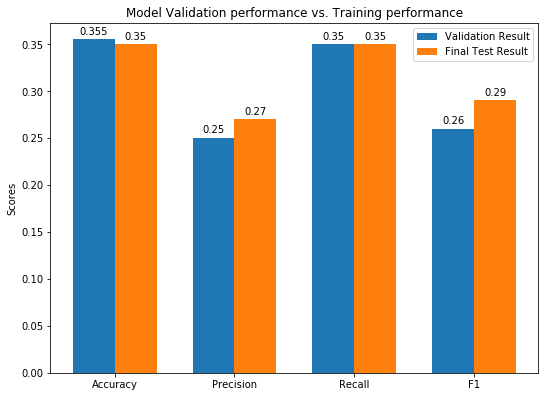

In [0]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
valid1 = [Model_valid_accuracy, Model_valid_precision, Model_valid_recall,Model_valid_f1]
test1 = [Model_test_accuracy, Model_test_precision, Model_test_recall, Model_test_f1]

x1 = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


#Reference https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/2, valid1, width, label='Validation Result')
rects2 = ax.bar(x1 + width/2, test1, width, label='Final Test Result')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Validation performance vs. Training performance')
ax.set_xticks(x1)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(8,6)
plt.show()




> The model has an accuracy of about 35%, which is about 6 times better than a random classifier (with accuracy of 6.7% = 1/15).


> The performance of the tuned best model on the validation data and test data is very close in terms of accuracy, precision, recall and f1. **It proved that the model is not overfitting**.



> However, since the trained score and test score are close and both not very high, **the model is potentially under fitting and needs to be further investigated (It is actually underfitting as discussed from later sections)**





### 6.3 Distribution Plot of the Predicted Targets


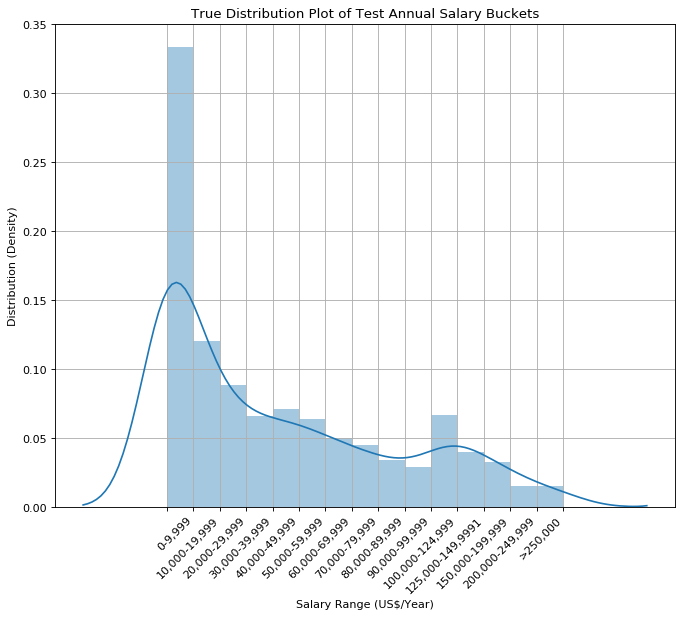

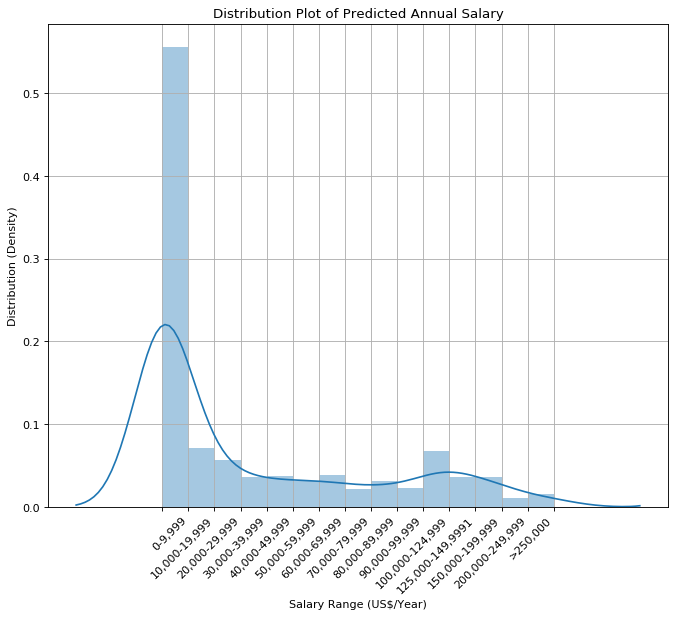

In [0]:
#separate targets and features
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
fig = sns.distplot(y_test,hist=True,bins=15,norm_hist=True)
loc = np.arange(start=0, stop=14.8, step=14/15)
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
a=[""]*16
for i in range(1,16):
  a[i] = salary_buckets_reverse[i-1]
fig.set_xticklabels(a)
plt.xticks(rotation=45, ha="right" )
plt.xticks(loc)
plt.xlabel("Salary Range (US$/Year)")
plt.ylabel("Distribution (Density)")
plt.grid(True)
plt.title("True Distribution Plot of Test Annual Salary Buckets") 
plt.show()

#separate targets and features
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
fig = sns.distplot(y_test_pred,hist=True,bins=15,norm_hist=True)
loc = np.arange(start=0, stop=14.8, step=14/15)
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
a=[""]*16
for i in range(1,16):
  a[i] = salary_buckets_reverse[i-1]
fig.set_xticklabels(a)
plt.xticks(rotation=45, ha="right" )
plt.xticks(loc)
plt.xlabel("Salary Range (US$/Year)")
plt.ylabel("Distribution (Density)")
plt.grid(True)
plt.title("Distribution Plot of Predicted Annual Salary") 
plt.show()



> By comparing with the distribution plot of the original test dataset and the distribution plot of the predicted result. The overall trend of the distribution curve is similar, both models have peak at bucket 0 (\$0-\$9999) and bucket 10 (\$1000000-124999\$). However, the trained model has a higher chance of putting a predicted relatively lower salary sample into the 0 bucket and put relatively higher predicted salary to the 10 bucket. **This is an obvious evidence of underfitting and the model is heavily biased** since the model only captures the major trend but dosen't capture the more detailed trend. (**This is more clearly displated in the later confusion matrix heat map**)





#### 6.4 Heat Map of the Confusion Matrix

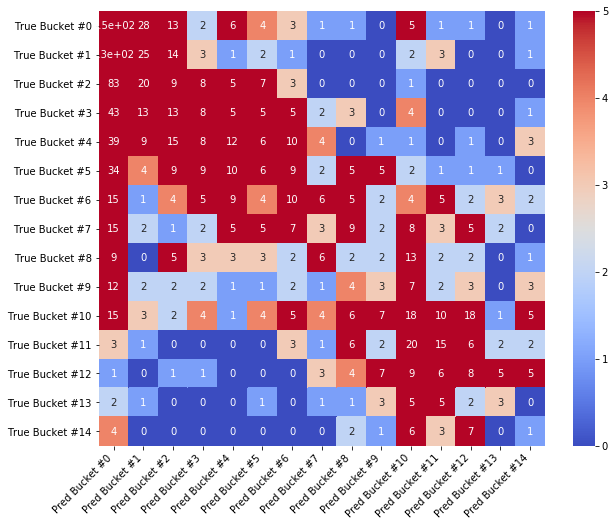

In [0]:
from sklearn.metrics import confusion_matrix
x_labels = []
y_labels = []
for i in range(15):
  x_labels.append("Pred Bucket #"+str(i))
  y_labels.append("True Bucket #"+str(i))
c_matrix = confusion_matrix(y_test,y_test_pred)
_, heatmap = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(c_matrix, vmin=0, vmax=5, cmap = 'coolwarm', annot = True)
heatmap.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(y_labels, rotation=0,horizontalalignment='right')
plt.show()




> The above is a heat map of the confusion matrix from test predictions. The x-axis is the predicted buckets and the y-axis is the true buckets. A high accuracy model should have higher value along the diagonal and its sides. However, from the above plot, we can see that the model has a higher change putting predicted value into bucket 0 and bucket 10 (as the column of bucket 0 and bucket 10 has a lot of high value grids), **it is another evidence showing the model is underfitting**. 

### 6.5 Suggestions on Improvement of Accuracy

1. During the model tuning stage, more values could be tried in the grid search method, which gives us a finer tuning. However, it takes more time and computational cost.
2. The model we are implementing is logistic regression, which is a linear model. However, it seems like the data is distributed nonlinearly, thus we might need to consider using some other non-linear model such as SVM or Decision tree.
3. The subgroup that I'm choosing is heavily unbalanced with majority people falling in the low salary range. Since there are not a lot of samples of higher salary people compared with the lower salary ones. I could pick a better subset such as only looking at people from the USA.
4. It is a multiclass classifying problem with ordering targets, unlike a binary classifying problem, tuning with accuracy score does not really optimize the model. A better way of judging the model could be implemented.
5. The target buckets are not linearly separated, the width of buckets in lower salary are not equal to those in higher salary range.